Hace una funcion que reciba un arreglo de 2 columnas (X,Y); donde cada renglon es una coordenada.

Sacar el punto medio de cada coordenada.

Distancia euclidiana.

Scatter en rojo puntos originales y con azul el centro

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def promedio(coor):
    return np.mean(coor, axis=0)

def puntoMedio(coor):
    x = coor[:, 0]
    y = coor[:, 1]
    prom = promedio(coor)
    return (x, y, prom)

coordenadas = np.array([
    [1, 1],
    [5, 3]
])

x, y, pM = puntoMedio(coordenadas)

fig, ax = plt.subplots()
ax.scatter(x, y, color='red', marker="*")
ax.scatter(pM[0], pM[1], color='blue', marker="+")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

{45.0: array([0., 0.]), 27.0: array([3., 4.]), 31.0: array([1., 1.]), 29.5: array([1.5, 4. ]), 23.4: array([2., 2.]), 23.5: array([3. , 1.5]), 25.499999999999996: array([3. , 3.7]), 30.099999999999998: array([4.5, 1.8]), 41.400000000000006: array([6., 3.])}
23.4
[2. 2.]


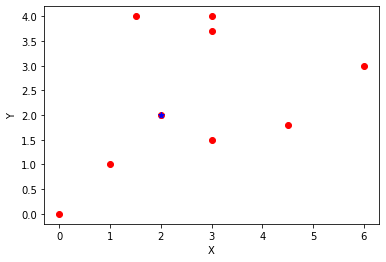

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sacarPuntoCentro(coor):
    distancias = {}
    minima = None
    for index, co in enumerate(coor):
        dist = 0
        for i, c in enumerate(coor):
            if (i != index):
                dist += abs(abs(c[0] - co[0]) + abs(c[1] - co[1]))
        distancias[dist] = co
        if (minima is None):
            minima = dist
        elif (minima > dist):
            minima = dist
    return (distancias, minima)

A = np.genfromtxt("./kmedias-1.csv")

dist, minima = sacarPuntoCentro(A)

print(dist)
print(minima)
print(dist[minima])

fig, ax = plt.subplots()

plt.scatter(A[:, 0], A[:, 1], color="red")

plt.scatter(dist[minima][0], dist[minima][1], color="blue", marker="*")

plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.genfromtxt('./kmedias-1.csv')

x = np.mean(datos, axis=0)

plt.plot(datos[:,0], datos[:,1], "g*")
plt.plot(x[0], x[1], "ro")
plt.show()
print(f"Datos= {datos}")
print(f"x= {x}")

### Generar K centroides de forma aleatorio

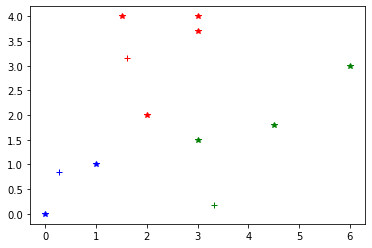

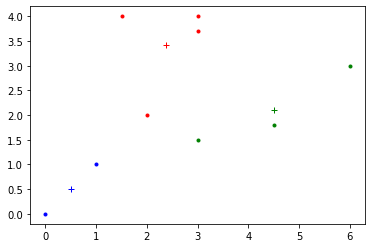

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def inicializarRandom(datos, k):
    ren, col = datos.shape
    min = np.min(datos, axis=0)
    max = np.max(datos, axis=0)
    centroides = np.random.random([k, col]) * (max - min) + min
    return centroides

def inicializarDistribuida(datos, k):
    ren, col = datos.shape
    min = np.min(datos, axis=0)
    max = np.max(datos, axis=0)
    centroides = np.zeros((k, col))
    incremento = (max-min) / k
    for item in range(k):
        centroides[item] = incremento * item + incremento / k
    return centroides

def getDistancia(a, b):
    return np.linalg.norm(a-b)

def asignacion(datos, centroides):
    numDatos, numCol = datos.shape
    K, numCol = centroides.shape
    distancias = np.zeros([numDatos, K])
    for i in range(numDatos):
        for j in range(K):
            distancias[i, j] = getDistancia(datos[i,:], centroides[j,:])
    indices = np.argmin(distancias, axis=1)
    return indices

datos = np.genfromtxt('./kmedias-1.csv')

K = 3
N, col = datos.shape

#centroides = inicializarDistribuida(datos, K)
centroides = inicializarRandom(datos, K)

indices = asignacion(datos, centroides)

colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(K):
    plt.plot(centroides[i, 0], centroides[i, 1], f"{colores[i]}+")
for i in range(N):
    plt.plot(datos[i, 0], datos[i, 1], f"{colores[indices[i]]}*")
plt.show()

def getIndice(indices, valor):
    A = []
    for index, value in enumerate(indices):
        if (value == valor):
            A.append(index)
    return A

def actualizarCentroides(datos, indices):
    ret = []
    list_indice = []
    for value in indices:
        if (value not in list_indice):
            list_indice.append(value)
    for index in list_indice:
        lista_1 = getIndice(indices, index)
        A = datos[lista_1, :]
        a = np.mean(A, axis=0)
        ret.append({'pos': a, 'color': index})
    return ret

centroides = actualizarCentroides(datos, indices)

for i, v in enumerate(centroides):
    plt.plot(v['pos'][0], v['pos'][1], f"{colores[v['color']]}+")

for i in range(N):
    plt.plot(datos[i, 0], datos[i, 1], f"{colores[indices[i]]}.")

plt.show()